# 2*2 Pixel Projection to 3D bloch sphere

In [1]:
import qiskit
import numpy as np
from qiskit import QuantumCircuit, BasicAer, IBMQ, Aer
from qiskit import transpile, execute
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector
from math import pi
from PIL import Image

In [5]:
import os 
os.path.abspath('')

'c:\\Users\\HCI\\Desktop\\Stereo'

In [6]:
path_img = 'pixel.png'
path_img = os.path.join(os.path.abspath(''),
                            path_img)
print(path_img)

c:\Users\HCI\Desktop\Stereo\pixel.png


In [65]:
def projection(pix_proj, r, h_img, w_img, h_proj, w_proj):

    (row, col) = pix_proj

    x = row
    y = col
    z = 0
    print("x,y,z = ",x,y,z)
    Q = np.array([x, y, z], dtype=np.float32)

    P = get_point_on_sphere(Q, r)
    
    return P


def get_point_on_sphere(point,r):

    [x, y, z] = point
    k = 2 * r**2 / (x**2 + y**2 + r**2)
    print("k = ", k)
    return (np.array([k * x, k * y, (k - 1) * r]))/ np.sqrt((k * x)**2+(k * y)**2+((k - 1) * r)**2)


In [66]:
def Statevec(P):
    x,y,z = P
    theta  = np.arccos(z)
    phi = np.arctan2(y,x)

    a = np.cos(theta/2)
    b = complex(np.sin(phi),np.sin(phi))*np.sin(theta/2)

    return Statevector([a,b])

In [67]:
img = np.array(Image.open(path_img))

h_img = img.shape[0]
w_img = img.shape[1]
h_proj = 2
w_proj = 2
r = 1.3

x = round(1/np.sqrt(2),3)

proj = np.array([[x,x,0],
                 [-x,x,0],
                 [-x,-x,0],
                 [x,-x,0]])


x,y,z =  0.707 0.707 0
k =  1.2566466343043108
x,y,z =  -0.707 0.707 0
k =  1.2566466343043108
x,y,z =  -0.707 -0.707 0
k =  1.2566466343043108
x,y,z =  0.707 -0.707 0
k =  1.2566466343043108
point_2d =  [array([0.707, 0.707, 0.   ]), array([-0.707,  0.707,  0.   ]), array([-0.707, -0.707,  0.   ]), array([ 0.707, -0.707,  0.   ])]
point_3d =  [array([0.68342246, 0.68342246, 0.25664663]), array([-0.68342246,  0.68342246,  0.25664663]), array([-0.68342246, -0.68342246,  0.25664663]), array([ 0.68342246, -0.68342246,  0.25664663])]


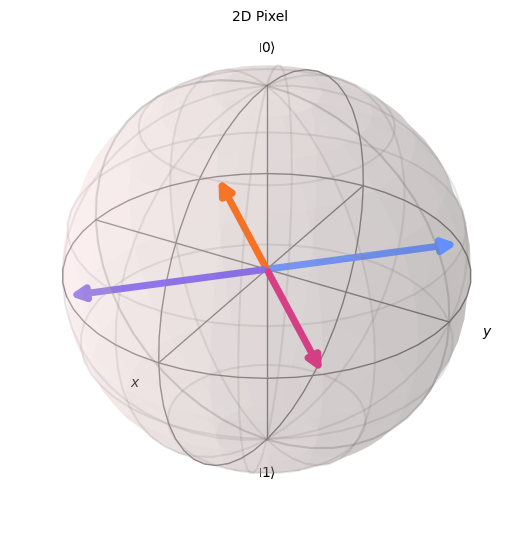

In [68]:
point_2d = []
point_3d = []

for i in proj:
    sphere = projection(i[:2], r, h_img, w_img, h_proj, w_proj)
    point_2d.append(i)    
    point_3d.append(sphere)

print('point_2d = ', point_2d)
print('point_3d = ', point_3d)


plot_bloch_vector(point_2d, title='2D Pixel')
#plot_bloch_vector(point_3d, title='3D projection')


# sphere 는 np.ndarray 이고, point_3d는 list이다. append(sphere) 로 np.ndarray를 list에 추가,
# point_3d는 array를 포함하는 list


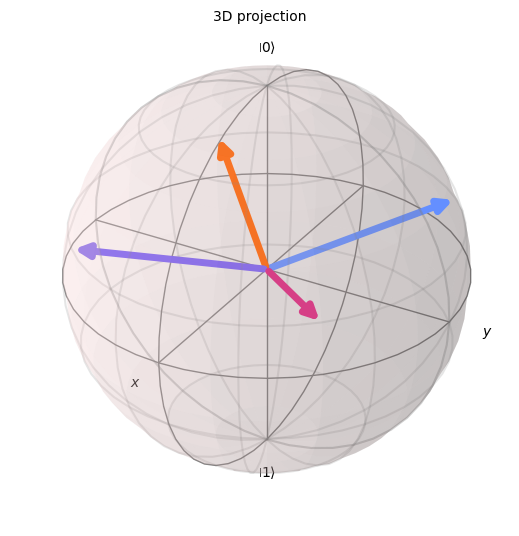

In [69]:
plot_bloch_vector(point_3d, title='3D projection')

In [20]:
def Statevec(P):
    x,y,z = P
    theta  = np.arccos(z)
    phi = np.arctan2(y,x)

    a = np.cos(theta/2)
    b = complex(np.sin(phi),np.sin(phi))*np.sin(theta/2)

    return Statevector([a,b])
